In [7]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import os
import random

In [8]:
directory_base = '/scratch/data/panel13/patches/'
image_rgb = imageio.imread('/scratch/data/panel13/clean.tif')
# image_mask = imageio.imread("/scratch/data/mystic_lamb/mystic_lamb_mask.png")
# image_mask = np.greater_equal(image_mask, 128).astype(np.uint8)

In [9]:
type(image_rgb[0,0,0])

numpy.uint8

In [4]:
# image_rgb = (image_rgb >> 8).astype('uint8')

In [5]:
# type(image_rgb[0,0,0])

In [10]:
patch_size = 16
directory_all = directory_base + '/all'

In [11]:
os.system('mkdir ' + directory_all)

counter = 0

for x in range(0, image_rgb.shape[0] - patch_size + 1, patch_size // 2):
    for y in range(0, image_rgb.shape[1] - patch_size + 1, patch_size // 2):
        patch = image_rgb[x: x + patch_size, y: y + patch_size, :]
#         patch_mask = image_mask[x: x + patch_size, y: y + patch_size]
#         plt.imshow(patch)
#         plt.show()
#         plt.imshow(patch_mask, cmap="gray")
#         plt.show()
        imageio.imwrite(directory_all + "/patch_panel13_" + str(counter).zfill(6) + ".bmp", patch)
#         print(directory + "patch_mystic_lamb_" + str(counter).zfill(6) + ".bmp")
        counter += 1

In [12]:
counter

36542

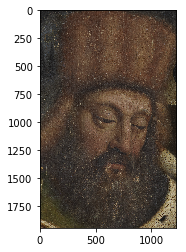

In [13]:
plt.imshow(image_rgb)

In [14]:
directory_train = directory_base + '/train/class0'
directory_validation = directory_base + '/validation/class0'
directory_test = directory_base + '/test/class0'

os.system('mkdir ' + directory_base + '/train')
os.system('mkdir ' + directory_base + '/validation')
os.system('mkdir ' + directory_base + '/test')

os.system('mkdir ' + directory_train)
os.system('mkdir ' + directory_validation)
os.system('mkdir ' + directory_test)


files = os.listdir(directory_all)
files_count = len(files)

random.shuffle(files)

cutoff1 = int(files_count * 0.8) # 40000 # int(files_count * 0.8)
cutoff2 = int(files_count * 0.9) # 40000 + 5000 # int(files_count * 0.9)
cutoff3 = files_count # 40000 + 5000 + 5000 # files_count


for i in range(cutoff1):
    os.system("mv " + directory_all + "/" + files[i] + " " + directory_train + "/" + files[i])
    
for i in range(cutoff1, cutoff2):
    os.system("mv " + directory_all + "/" + files[i] + " " + directory_validation + "/" + files[i])
    
for i in range(cutoff2, cutoff3):
    os.system("mv " + directory_all + "/" + files[i] + " " + directory_test + "/" + files[i])
